## Doing Arithmatic on Quantum Hardware

As the development of quantum computers progresses by the day, there becomes a need to find practical applications for such devices and how to implement the system. Here, I challenged myself to get a quantum computer to perform a simple task, addition and subtraction, and to see how the quantum hardware would react to the task. 

In [1]:
import matplotlib.pyplot as mplpy
import numpy as npy
from qiskit import (QuantumRegister,
                    ClassicalRegister,
                    QuantumCircuit,
                    execute,
                    Aer,
                    IBMQ)
from qiskit.quantum_info import state_fidelity
from qiskit.providers.aer import noise

import time
from copy import deepcopy


from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import QuantumError, ReadoutError
from qiskit.providers.aer.noise.errors import pauli_error
from qiskit.providers.aer.noise.errors import depolarizing_error
from qiskit.providers.aer.noise.errors import thermal_relaxation_error
from qiskit.providers.aer.noise.errors import phase_damping_error
from qiskit.providers.aer.noise.errors import amplitude_damping_error
from qiskit.providers.aer.noise.errors import phase_amplitude_damping_error
# Tomography functions
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
import qiskit.ignis.mitigation.measurement as mc

So the first issue I encountered is how do I go about imputing my numbers into the quantum system? For this I came up with a simple solution. I could break down the numbers into binary digits, where each one and zero would correspond to a specific rotation at some point in the circuit. As for getting the computer to know which action to perform, I could entangle my system to two qubits so that if that if one of those two qubit was in the excited state, say addition would be performed. If the other one of those two qubits was in the excited state state, say subtraction would be performed, and I could control the excitation and relaxation using the same method I used to imput my numbers into the quantum system.

In [7]:
IBMQ.save_account('c8d516682d06a7a89ac7bc68944d6b55e4cd85d740abad5e4fc28dbfb2007cc0be7702045424da53f10178beabbd4dbab57b235f47156f4c90e16bfeafd6037b')
simulator = Aer.get_backend('qasm_simulator')
j = QuantumRegister(11)
c = ClassicalRegister(9)

circuit = QuantumCircuit(j,c)
pi = 3.141592652
value1 = 30
action = "+"
value2 = 25
o = p = q = r = s = t = u = v = w = x = y = z = 0    

if value1 < value2 and action == "-":
    print("ERROR, cannot accurately calculate negative numbers *yet*")
if value1 >= 16:
    o = 1
    value1 = value1 - 16
if value1 >= 8:
    t = 1
    value1 = value1 - 8
if value1 >= 4:
    s = 1
    value1 = value1 - 4
if value1 >= 2:
    r = 1
    value1 = value1 - 2
if value1 == 1:
    q = 1
if value2 >= 16:
    p = 1
    value2 = value2 - 16
if value2 >= 8:
    z = 1
    value2 = value2 - 8
if value2 >= 4:
    y = 1
    value2 = value2 - 4
if value2 >= 2:
    x = 1
    value2 = value2 - 2
if value2 == 1:
    w = 1
if action == "+":
    v = 1
if action == "-":
    u = 1
if action == "+/-":
    u = 1
    v = 1
    

Now you may be wonding what the "+/-" action is supposed to mean. Well, i realized that with this circuit, I could do addition and subtraction in parallel, both adding an subtracting the number to get some unique number not classically related to my inputs. We will get more on that later. Right now, lets look at the circuit.

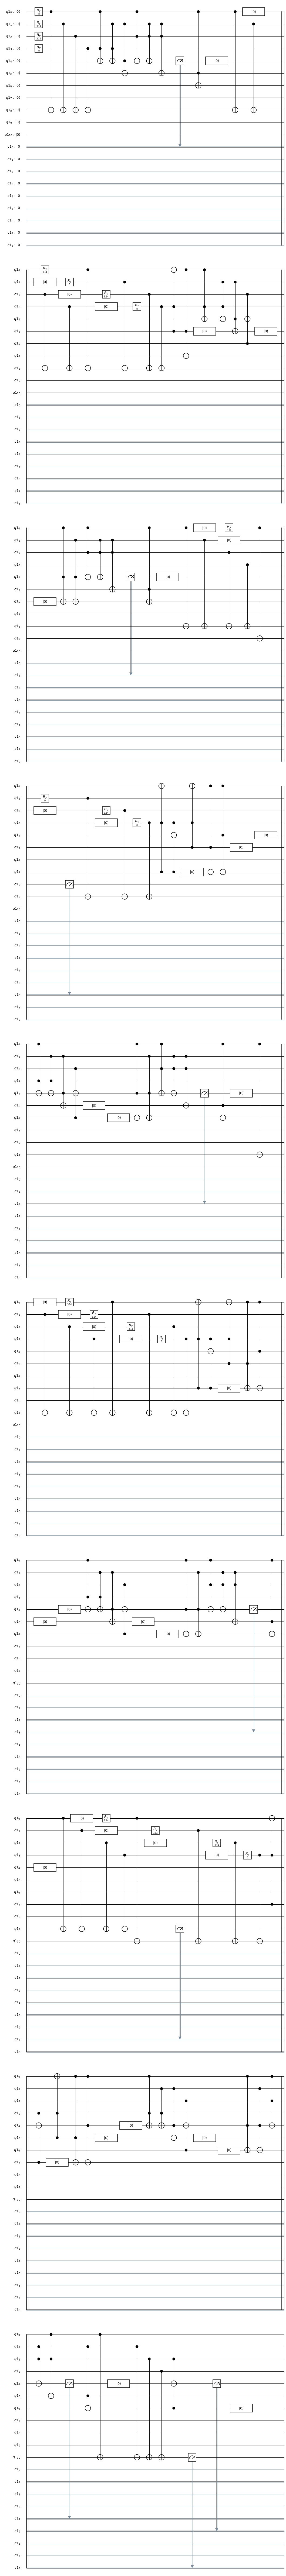

In [8]:
circuit.ry(v*pi,2)
circuit.ry(u*pi,3)
circuit.ry(q*pi,0)
circuit.ry(w*pi,1)
circuit.cx(0,8)
circuit.cx(1,8)
circuit.cx(2,8)
circuit.cx(3,8)
circuit.ccx(0,3,4)
circuit.ccx(1,3,4)
circuit.ccx(1,4,5)
circuit.ccx(0,2,4)
circuit.ccx(2,1,4)
circuit.ccx(1,2,5)
circuit.ccx(0,5,6)
circuit.cx(0,8)
circuit.cx(1,8)
circuit.cx(2,8)
circuit.cx(3,8)
circuit.measure(j[4],c[0])
circuit.reset(j[0])
circuit.reset(j[1])
circuit.reset(j[4])
circuit.reset(j[2])
circuit.reset(j[3])
circuit.ry(v*pi,2)
circuit.ry(u*pi,3)

circuit.ry(r*pi,0)
circuit.ry(x*pi,1)
circuit.cx(0,8)
circuit.cx(1,8)
circuit.cx(2,8)
circuit.cx(3,8)
circuit.ccx(3,5,0)
circuit.ccx(0,5,7)
circuit.reset(j[5])
circuit.ccx(0,3,4)
circuit.ccx(1,3,4)
circuit.ccx(1,4,5)
circuit.ccx(6,2,4)
circuit.reset(j[6])
circuit.ccx(4,0,6)
circuit.ccx(4,1,6)
circuit.ccx(0,2,4)
circuit.ccx(1,2,4)
circuit.reset(j[5])
circuit.ccx(1,2,5)
circuit.ccx(0,5,6)
circuit.cx(0,8)
circuit.cx(1,8)
circuit.cx(2,8)
circuit.cx(3,8)
circuit.measure(j[4],c[1])
circuit.measure(j[8],c[6])
circuit.reset(j[0])
circuit.reset(j[1])
circuit.reset(j[4])
circuit.reset(j[2])
circuit.reset(j[3])
circuit.ry(v*pi,2)
circuit.ry(u*pi,3)

circuit.ry(s*pi,0)
circuit.ry(y*pi,1)
circuit.cx(0,9)
circuit.cx(1,9)
circuit.cx(2,9)
circuit.cx(3,9)
circuit.ccx(3,7,0)
circuit.ccx(3,7,4)
circuit.reset(j[7])
circuit.ccx(3,5,0)
circuit.ccx(0,5,7)
circuit.ccx(0,4,7)
circuit.reset(j[5])
circuit.reset(j[4])
circuit.ccx(0,3,4)
circuit.ccx(1,3,4)
circuit.ccx(1,4,5)
circuit.ccx(6,2,4)
circuit.reset(j[6])
circuit.ccx(4,0,6)
circuit.ccx(4,1,6)
circuit.ccx(0,2,4)
circuit.ccx(2,1,4)
circuit.reset(j[5])
circuit.ccx(1,2,5)
circuit.ccx(0,5,6)
circuit.cx(0,9)
circuit.cx(1,9)
circuit.cx(2,9)
circuit.cx(3,9)
circuit.measure(j[4],c[2])
circuit.reset(j[0])
circuit.reset(j[1])
circuit.reset(j[4])
circuit.reset(j[2])
circuit.reset(j[3])
circuit.ry(v*pi,2)
circuit.ry(u*pi,3)

circuit.ry(t*pi,0)
circuit.ry(z*pi,1)
circuit.cx(0,9)
circuit.cx(1,9)
circuit.cx(2,9)
circuit.cx(3,9)
circuit.ccx(3,7,0)
circuit.ccx(3,7,4)
circuit.reset(j[7])
circuit.ccx(3,5,0)
circuit.ccx(0,5,7)
circuit.ccx(0,4,7)
circuit.reset(j[5])
circuit.reset(j[4])
circuit.ccx(0,3,4)
circuit.ccx(1,3,4)
circuit.ccx(1,4,5)
circuit.ccx(6,2,4)
circuit.reset(j[6])
circuit.ccx(4,0,6)
circuit.ccx(4,1,6)
circuit.ccx(0,2,4)
circuit.ccx(2,1,4)
circuit.reset(j[5])
circuit.ccx(1,2,5)
circuit.ccx(0,5,6)
circuit.cx(0,9)
circuit.cx(1,9)
circuit.cx(2,9)
circuit.cx(3,9)
circuit.measure(j[4],c[3])
circuit.measure(j[9],c[7])
circuit.reset(j[0])
circuit.reset(j[1])
circuit.reset(j[4])
circuit.reset(j[2])
circuit.reset(j[3])
circuit.ry(v*pi,2)
circuit.ry(u*pi,3)

circuit.ry(o*pi,0)
circuit.ry(p*pi,1)
circuit.cx(0,10)
circuit.cx(1,10)
circuit.cx(2,10)
circuit.cx(3,10)
circuit.ccx(3,7,0)
circuit.ccx(3,7,4)
circuit.reset(j[7])
circuit.ccx(3,5,0)
circuit.ccx(0,5,7)
circuit.ccx(0,4,7)
circuit.reset(j[5])
circuit.reset(j[4])
circuit.ccx(0,3,4)
circuit.ccx(1,3,4)
circuit.ccx(1,4,5)
circuit.ccx(6,2,4)
circuit.reset(j[6])
circuit.ccx(4,0,6)
circuit.ccx(4,1,6)
circuit.ccx(2,0,4)
circuit.ccx(2,1,4)
circuit.reset(j[5])
circuit.ccx(2,0,5)
circuit.ccx(1,5,6)
circuit.cx(0,10)
circuit.cx(1,10)
circuit.cx(2,10)
circuit.cx(3,10)
circuit.measure(j[10],c[8])
circuit.measure(j[4],c[4])
circuit.reset(j[4])
circuit.ccx(6,2,4)
circuit.measure(j[4],c[5])
circuit.reset(j[6])
circuit.draw(output='mpl')

Ok then, as you may have noticed, this is a large circuit. So this circuit can add and subtract any two numbers less than thirty two. This is an arbitrary limitation because, as you may have noticed, this circuit is just the repetition of one circuit. In theory, you could just copy and paste this to infinity and calculate numbers of infinite legnth, or you could break down this circuit to the repetitive parts and just run it repeatedly, which would lower the circuit depth. All one would need to do is measure the carry qubits. Essencially, in this circuit, qubits one and zero are our numeric imputs, qubits two and three are our actions, qubit four is the qubit that we will measure for the answer, qubit five is a work qubit (assists in the "carry" operation) and qubits 6 and 7 are our addition and subtraction carry qubits respectively. Qubits eight to ten are our spectator qubits, more on them later in the presentation. 

So now that we have our circuit, let us test it. We can run it on the QASM simulator for now. For a reminder, we are adding 30 and 25 in this test.

In [10]:
job = execute(circuit, simulator, shots=1)
result = job.result()
counts = str(result.get_counts(circuit))
print(counts)
binary = counts[5:11]

print(binary)

number = 0
for i in range(len(binary)):
    if (binary[i] == "1"):
        number += 2 ** ((len(binary) - i)-1)
print(number)

{'000110111': 1}
110111
55


Ok so our circuit works under idealconditions. Now we can investigate running the addition and subtraction circuit simultaneously. If we do so, we get this table
![title](pictures/picture.png)

Where the y axis corresponds to imput 2, and the x axis corresponds to imput one. I don't quite understand why I get these specific sets of numbers, or rather I don't know if they have any relevance.

However real systems are not perfect, our circuit is noisy and subject to errors. If we run our circuit with a little noise, we get interesting results.

In [28]:
p_reset = 0.01
p_meas = 0.01
p_gate1 = 0.01

# QuantumError objects
error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
error_gate1 = pauli_error([('X',p_gate1), ('I', 1 - p_gate1)])
error_gate2 = error_gate1.tensor(error_gate1)

# Add errors to noise model
noise_bit_flip = NoiseModel()
noise_bit_flip.add_all_qubit_quantum_error(error_reset, "reset")
noise_bit_flip.add_all_qubit_quantum_error(error_meas, "measure")
noise_bit_flip.add_all_qubit_quantum_error(error_gate1, ["u1", "u2", "u3"])
noise_bit_flip.add_all_qubit_quantum_error(error_gate2, ["cx"])
job = execute(circuit, simulator, shots=1,
              basis_gates=noise_bit_flip.basis_gates,
              noise_model=noise_bit_flip)
result = job.result()
counts = result.get_counts(circuit)
print(counts)
counts = str(result.get_counts(circuit))
binary = counts[5:11]

if '1' in counts[2:4]:
    print('error')
print(binary)

number = 0
for i in range(len(binary)):
    if (binary[i] == "1"):
        number += 2 ** ((len(binary) - i)-1)
print(number)

{'010001011': 1}
error
001011
11


However, this is where our spectator qubits can help. They can detect an error in our quantum system using cnot gates to verify that our inputs stay the same throughout the circuit so that our output is not in error. If we run this circuit repeatedly, and take the mode "error free" answers, we can have get the right answers